The objective of this exercise is to fit parameters of first order Laplace trasfer function of a step response model.
we will first generate a dynamic dataset (input-output pair) , then fit parameters of tranfer function, and finally compare the output with the model prediction.

In [1]:
import scipy
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create a lti 
G = scipy.signal.lti([4],[10,1])

In [3]:
#create an input array and time array
u= np.ones(400)
#make random step signals
u[0:20] = 0
u[100:110]=0
u[200:250]=0
t = range(400)

In [4]:
#simulate the transfer function using input array and time
ysim = scipy.signal.lsim(G,U=u,T=t)[1]

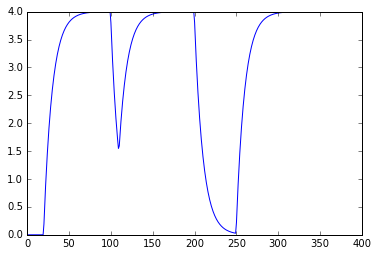

In [5]:
%matplotlib inline
plt.plot(ysim)

In [6]:
#create a white noise
noise = np.random.rand(400)

In [7]:
#add noise with signal
y_noisy = ysim + noise

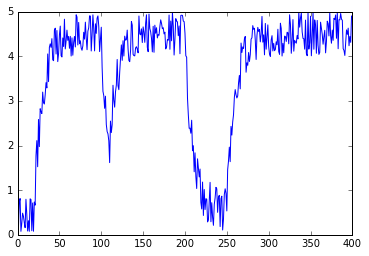

In [8]:
plt.plot(y_noisy)

a fir model is defined as follows
$$y_t


In [11]:
#estimated deadtime and steady state time
dt = 0
ss = 50

Parametric fitting is non-linear optimization problem. We will use non linear least squares to get the optimal parameters. First define the residual function as the difference between the actual 'y' and the model predicted 'y'. Notice that residual function is automatically coverted to "sum of squares of residuals" by the least squares algorithm. 

In [24]:
def residual(P):
    G = scipy.signal.lti([P[0]],[P[1],1])
    return (scipy.signal.lsim(G,U=u,T=t)[1]-y_noisy)

In [28]:
res = scipy.optimize.least_squares(residual,x0=np.array([1,1]))


In [30]:
k=res.x[0]
tau = res.x[1]

In [31]:
y_model = scipy.signal.lsim(scipy.signal.lti([k],[tau,1]),U=u,T=t)[1]

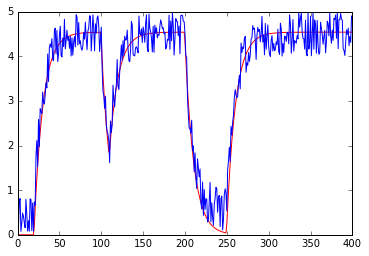

In [33]:
plt.plot(y_model,'r')
plt.plot(y_noisy)